In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [9]:
path = '/Users/jayvier/Documents/GitHub/GTZAN_Dataset/images_original'

In [10]:
#Rescale Image Data
data_gen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., validation_split=0.2)

In [11]:
batch_size = 32
train_generator=data_gen.flow_from_directory(path, target_size=(300,300), batch_size=batch_size, class_mode = 'categorical', subset='training')

Found 800 images belonging to 10 classes.


In [12]:
validation_generator = image_datagen_train=data_gen.flow_from_directory(path, target_size=(300,300), batch_size=32, class_mode = 'categorical', subset='validation')

Found 199 images belonging to 10 classes.


#### Transfer learning with VGG16

We will use the VGG16 model that has been pre-trained on a dataset of images. Then freeze the layers and add new trainable layers to run on our dataset.

In [13]:
from tensorflow.keras.applications import VGG16

model = VGG16(include_top=False, input_shape=(300,300,3))

In [14]:
for layer in model.layers:
  layer.trainable=False         # Freezes the layers

In [15]:
model.summary()       # summary of convolutional layers in VGG16 model

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [16]:
output=model.layers[-1].output
model_final=tf.keras.layers.Flatten()(output)
model_final=tf.keras.layers.Dense(512,activation='relu')(model_final)
model_final=tf.keras.layers.Dense(64,activation='relu')(model_final)
model_final=tf.keras.layers.Dense(10,activation='softmax')(model_final)

In [17]:
model=tf.keras.models.Model(model.input,model_final)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#model.fit_generator(image_datagen,epochs=10)
model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 10)

Epoch 1/10
25/25 [==============================] - 224s 9s/step - loss: 3.5410 - accuracy: 0.2262 - val_loss: 1.9715 - val_accuracy: 0.3125
Epoch 2/10
25/25 [==============================] - 247s 10s/step - loss: 1.3953 - accuracy: 0.5075 - val_loss: 1.5523 - val_accuracy: 0.5000
Epoch 3/10
25/25 [==============================] - 256s 10s/step - loss: 0.9587 - accuracy: 0.6762 - val_loss: 1.4294 - val_accuracy: 0.5469
Epoch 4/10
25/25 [==============================] - 238s 10s/step - loss: 0.7210 - accuracy: 0.7912 - val_loss: 1.2022 - val_accuracy: 0.6146
Epoch 5/10
25/25 [==============================] - 241s 10s/step - loss: 0.6598 - accuracy: 0.8087 - val_loss: 1.2528 - val_accuracy: 0.5938
Epoch 6/10
25/25 [==============================] - 231s 9s/step - loss: 0.5449 - accuracy: 0.8388 - val_loss: 1.2119 - val_accuracy: 0.5990
Epoch 7/10
25/25 [==============================] - 219s 9s/step - loss: 0.4185 - accuracy: 0.8938 - val_loss: 1.1809 - val_accuracy: 0.6250
Epoch 8/1

In [18]:
model_dropout=tf.keras.layers.Flatten()(output)
model_dropout=tf.keras.layers.Dense(512, activation='elu')(model_dropout)
model_dropout=tf.keras.layers.Dense(64, activation='elu')(model_dropout)
model_dropout=tf.keras.layers.Dense(64, activation='elu')(model_dropout) 
model_dropout=tf.keras.layers.Dropout(0.2)(model_dropout)        # Single Dropout layer added with a dropout rate of 0.5
model_dropout=tf.keras.layers.Dense(10, activation='softmax')(model_dropout)

In [19]:
dmodel=tf.keras.models.Model(model.input, model_dropout)

dmodel.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['acc'])

In [20]:
model_histories = {}

model_histories['Dropout'] = dmodel.fit(train_generator,
                                        steps_per_epoch = train_generator.samples // batch_size,
                                        validation_data = validation_generator,
                                        validation_steps = validation_generator.samples // batch_size,
                                        epochs = 10)

Epoch 1/10
25/25 [==============================] - 218s 9s/step - loss: 4.3870 - acc: 0.1587 - val_loss: 1.9001 - val_acc: 0.3438
Epoch 2/10
25/25 [==============================] - 210s 8s/step - loss: 1.7298 - acc: 0.4125 - val_loss: 1.9227 - val_acc: 0.2760
Epoch 3/10
25/25 [==============================] - 210s 8s/step - loss: 1.4332 - acc: 0.5038 - val_loss: 1.5372 - val_acc: 0.5104
Epoch 4/10
25/25 [==============================] - 208s 8s/step - loss: 1.2570 - acc: 0.5612 - val_loss: 1.4479 - val_acc: 0.5573
Epoch 5/10
25/25 [==============================] - 209s 8s/step - loss: 1.0813 - acc: 0.6425 - val_loss: 1.3069 - val_acc: 0.5469
Epoch 6/10
25/25 [==============================] - 229s 9s/step - loss: 0.9355 - acc: 0.6963 - val_loss: 1.5138 - val_acc: 0.5365
Epoch 7/10
25/25 [==============================] - 231s 9s/step - loss: 0.7551 - acc: 0.7525 - val_loss: 1.1836 - val_acc: 0.6302
Epoch 8/10
25/25 [==============================] - 233s 9s/step - loss: 0.5972 - a

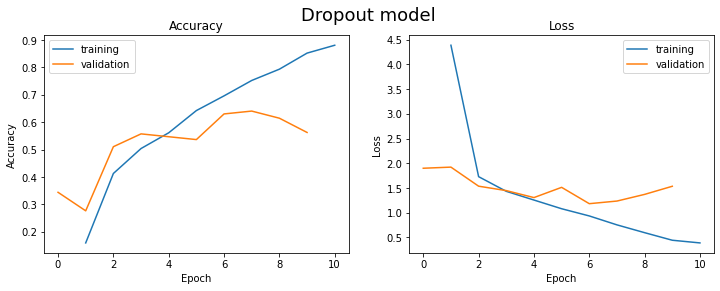

<Figure size 864x288 with 0 Axes>

In [21]:
fig = plt.figure(figsize=(12,4))
fig.suptitle('Dropout model', fontsize=18)

plt.subplot(1,2,1)          # no. of columns=1, no. of rows=2, pos=1
plt.plot(np.linspace(1,10,10), model_histories['Dropout'].history['acc'], label='training')
plt.plot(model_histories['Dropout'].history['val_acc'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.linspace(1,10,10), model_histories['Dropout'].history['loss'], label='training')
plt.plot(model_histories['Dropout'].history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

fig2 = plt.figure(figsize=(12,4))
fig2.suptitle('Model', fontsize=18)

plt.show()

In [86]:
model_histories['Dropout'].history

{'loss': [2.8877272605895996,
  2.2802553176879883,
  2.2866437435150146,
  2.261284112930298,
  2.205432176589966,
  2.2396185398101807,
  2.230015277862549,
  2.1942946910858154,
  2.1988883018493652,
  2.1664798259735107],
 'acc': [0.0925000011920929,
  0.11500000208616257,
  0.1274999976158142,
  0.13625000417232513,
  0.1550000011920929,
  0.13625000417232513,
  0.14249999821186066,
  0.1537500023841858,
  0.14499999582767487,
  0.1550000011920929],
 'val_loss': [2.2054872512817383,
  2.2923104763031006,
  2.295053243637085,
  2.186047315597534,
  2.151346206665039,
  2.259601354598999,
  2.2470293045043945,
  2.1225643157958984,
  2.1517834663391113,
  2.1725382804870605],
 'val_acc': [0.109375,
  0.1302083283662796,
  0.1302083283662796,
  0.2083333283662796,
  0.1927083283662796,
  0.1666666716337204,
  0.1770833283662796,
  0.203125,
  0.2083333283662796,
  0.203125]}

In [116]:
for i in model_histories.keys():
    print(model_histories[i].history['acc'])

[0.0925000011920929, 0.11500000208616257, 0.1274999976158142, 0.13625000417232513, 0.1550000011920929, 0.13625000417232513, 0.14249999821186066, 0.1537500023841858, 0.14499999582767487, 0.1550000011920929]


In [119]:
model_histories.values()

dict_values([<tensorflow.python.keras.callbacks.History object at 0x7fc5c6399100>])